<a href="https://colab.research.google.com/github/KilovoIt/Jupyter-Notebooks/blob/main/Roulette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Creating Roulette Set
array = ['0', '00', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
df =pd.DataFrame(array, columns=['Value'])

#Roulette not only goes by numbers, it goes by colors as well. Let's add some colors:
colors = ['Red', 'Black']
df['Color'] = pd.DataFrame(colors * 19)

#Everything looks fine, but sectors '0' and '00' should be green. Let's fix that:
df.loc[0:1, 'Color'] = ['Green', 'Green']

In [2]:
#Importing Random function and simulating the Roulette spin:
import random

df.iloc[[random.randint(0, 37)]]

,Value,Color
30,29,Red


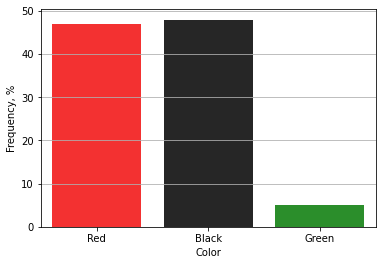

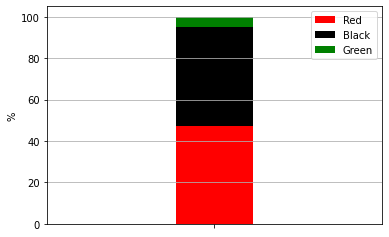

In [12]:
#Creating loop that will take N random numbers, simulating N Roulette spins
recordings=[]
for i in range(1000):
    recordings.append(random.randint(0, 37))

#Their indexes recorded into an array and used to retrieve the full information about the sector.
attempts = pd.DataFrame(columns=df.columns)                      
for k in recordings:
    attempts = attempts.append(df.loc[[k]])

result = pd.DataFrame(columns=attempts.Color.unique())
result.Black = [attempts[attempts['Color'] == 'Black'].value_counts().sum()]/attempts.value_counts().sum()*100
result.Red = [attempts[attempts['Color'] == 'Red'].value_counts().sum()]/attempts.value_counts().sum()*100
result.Green = [attempts[attempts['Color'] == 'Green'].value_counts().sum()]/attempts.value_counts().sum()*100


#Plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


ax = sns.barplot(x=result.columns, y=result.iloc[0], palette=['red', 'black', 'green'], saturation=0.9, alpha=0.85)
ax.set(xlabel='Color', ylabel='Frequency, %')
ax.grid('on')
ax.xaxis.grid(None)

ax1 = result.plot(kind='bar', stacked=True, color=['red', 'black', 'green'], width=0.15)
ax1.set(xlabel='', ylabel='%')
ax1.set_xticklabels([])
ax1.yaxis.grid(None)
plt.show()


In [247]:
results = pd.DataFrame(columns=['Red', 'Black', 'Green'])


for p in range(10):    
    recordings=[]
    for i in range(1000):
        recordings.append(random.randint(0, 37))

    #Their indexes recorded into an array and used to retrieve the full information about the sector.
    attempts = pd.DataFrame(columns=df.columns)                      
    for k in recordings:
        attempts = attempts.append(df.loc[[k]])

    result = pd.DataFrame(columns=attempts.Color.unique())
    result.Black = [attempts[attempts['Color'] == 'Black'].value_counts().sum()]/attempts.value_counts().sum()*100
    result.Red = [attempts[attempts['Color'] == 'Red'].value_counts().sum()]/attempts.value_counts().sum()*100
    result.Green = [attempts[attempts['Color'] == 'Green'].value_counts().sum()]/attempts.value_counts().sum()*100
    results = results.append(result)

results = results.reset_index()
results.drop(['index'], axis=1, inplace=True)
results


,Red,Black,Green
0,48.1,46.5,5.4
1,47.1,47.5,5.4
2,47.5,47.8,4.7
3,47.7,46.0,6.3
4,47.4,47.0,5.6
5,51.2,44.0,4.8
6,45.7,49.9,4.4
7,49.7,45.3,5.0
8,48.3,46.9,4.8
9,48.4,46.5,5.1


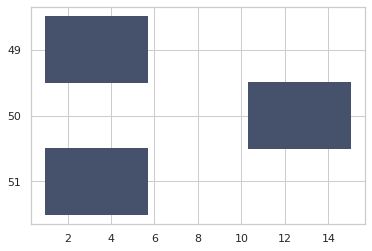

In [252]:
sns.histplot(y=['49', '50', '51'], x=[1, 15, 1])